# 2 Session : PCA

## Exercise 3: Data scaling

The goal of this exercise is to explore how data scaling affects the PCA projection.

In general the data matrix, $\mathbf{X}$, can be centered and scaled as follows:

$$
\tilde{\mathbf{X}} = (\mathbf{X} - \mathbf{C}) \mathbf{D}^{-1}
$$

where $\mathbf{C}$ is a matrix of centers and $\mathbf{D}$ is a diagonal matrix of scales. We will denote the $i$th variable in a dataset as $X_i$.

The matrix of centers is populated by the mean values of each variable:

$$
\begin{gather}
\mathbf{C} = 
\begin{bmatrix}
c_1 & c_2 &  \dots & c_n \\
c_1 & c_2 &  \dots & c_n \\
c_1 & c_2 & \dots & c_n \\
\vdots \\
c_1 & c_2 & \dots & c_n \\
\end{bmatrix}
\end{gather}
$$

where $c_i = mean(X_i)$.

In contrast, the diagonal of the matrix of scales can be populated in many different ways. In general, we can write:

$$
\begin{gather}
\mathbf{D} = 
\begin{bmatrix}
d_1 & 0 & 0 & 0 & 0 & \dots & 0 \\
0 & d_2 & 0 & 0 & 0 & \dots & 0 \\
0 & 0 & d_3 & 0 & 0 & \dots & 0 \\
\vdots \\
0 & 0 & 0 & 0 & 0 & \dots & d_n \\
\end{bmatrix}
\end{gather}
$$

where $d_i$ is the scaling factor applied on the $i$th variable $X_i$.

In this exercise, we will explore three ways of scaling the data:

- No scaling, where:

$$
d_i = 1
$$

- Standard (auto) scaling, where:

$$
d_i = std(X_i)
$$

- VAriable STability (VAST) scaling, where:

$$
d_i = std(X_i)^2 / mean(X_i)
$$



**Note, that `sklearn`'s PCA always centers the data, but does not scale the data! You have to handle the scaling by yourself.**

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

%matplotlib inline

We will use the wine dataset, which has 178 observations and 13 variables. 

In [2]:
from sklearn.datasets import load_wine

wine_data      = load_wine().data
feature_names  = load_wine().feature_names
n_features     = len(feature_names)

There are three distinct wine classes in the data, and we can access the classification of each wine observation:

In [3]:
wine_target = load_wine().target
target_names = load_wine().target_names

In [4]:
print(f'wine_data shape    = {wine_data.shape}')
print(f'Feature names      = {feature_names[0:3]} ...')
print(f'n_features         = {n_features} \n')

print(f'Wine_target shape  = {wine_target.shape}')
print(f'Target names       = {target_names}')
print(f'len(target_names)  = {len(target_names)}')


wine_data shape    = (178, 13)
Feature names      = ['alcohol', 'malic_acid', 'ash'] ...
n_features         = 13 

Wine_target shape  = (178,)
Target names       = ['class_0' 'class_1' 'class_2']
len(target_names)  = 3


We will compute PCA using all 13 principal components:

In [5]:
n_components = 13

## PCA with no data scaling

We can inspect the wine data sets when variables are not scaled. For this purpose, the `pandas` library is very useful. We can show 10 first rows of the data matrix.

You can see that different wine parameters have different numerical ranges:

In [6]:
df = pd.DataFrame(wine_data, columns=feature_names)
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


Perform the PCA transformation of the `wine_data` when no scaling is applied to the data and compute the eigenvectors and eigenvalues:
 - To do: 
     - obtain X0 (dataset without preproccessing)
     - compute pca_0 : 
         - L0 = eigenvalues
         - A0 = eigenvectors
         - Z0 = PC scores

In [7]:
pca_0 = PCA(n_components=n_components)

X0 = wine_data

# Complete the PCA steps...
pca_0.fit(X0)

L0 = pca_0.explained_variance_ratio_
A0 = pca_0.components_.T
Z0 = X0 @ A0

Visualize the two-dimensional PCA projection of the data set. Color the projection by the three classes as per `wine_target`:

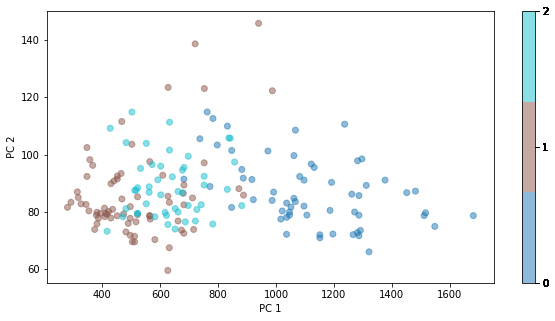

In [8]:
fig = plt.figure(figsize=(10,5))

# Create a scatter plot of the projection
scat = plt.scatter(Z0[:,0], Z0[:,1], c=wine_target, cmap=plt.get_cmap('tab10',3),alpha=0.5)
plt.colorbar(scat, ticks=wine_target)
plt.xlabel(' PC 1 ')
plt.ylabel(' PC 2 ')
plt.show()

## PCA with standard (auto) scaling

Center and scale the data using standard (auto) scaling, according to the formula given at the top of the notebook.

Hint: Python's `numpy` library allows you to subtract, add, multiply or divide each column of a data matrix simply by specifying a vector of values.

For instance, if you want to access a mean value of each data **column**, you can write:

```
np.mean(X, axis=0)
```

If you want to access a mean value of each data **row**, you can write:

```
np.mean(X, axis=1)
```

Both `np.mean(X, axis=0)` and `np.mean(X, axis=1)` are vectors, not a matrices! The parameter `axis` controls along which axis of the data you want the value to be computed. 

In the cell below, remember to use the `axis` parameter correctly!

 - To do: 
     - obtain X_std (dataset preprocessed with mean and STD)
     - inspect the first 10 rows of the wine data after scaling

In [9]:
c = np.mean(X0,axis=0) # centering vector
d = np.std(X0,axis=0)  # scaling vector

print(c.shape )
print(d.shape )

X_std = ( X0 - c )/ d

# Inspect the scaled data set
df = pd.DataFrame(X_std, columns=feature_names)
df.head(10)

(13,)
(13,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


Perform the PCA transformation of the `wine_data` when standard (auto) scaling is applied to the data and compute the new eigenvectors and eigenvalues:
- To do: 
     - compute pca_std : 
         - L_std = eigenvalues
         - A_std = eigenvectors
         - Z_std = PC scores

In [10]:
pca_std = PCA(n_components=n_components)

# Complete the PCA steps...
pca_std.fit(X_std)

L_std = pca_std.explained_variance_ratio_
A_std = pca_std.components_.T
Z_std = X_std @ A_std

Visualize the two-dimensional PCA projection of the data set. Color the projection by the three classes as per `wine_target`. What changes?

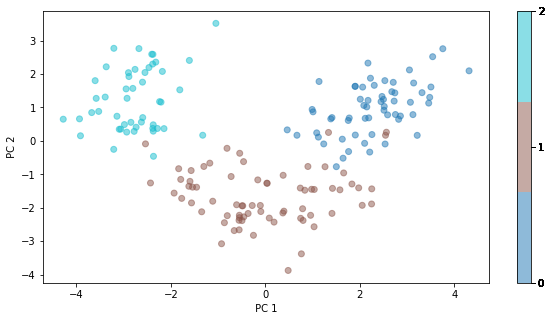

In [11]:
fig = plt.figure(figsize=(10,5))

# Create a scatter plot of the projection
scat = plt.scatter(Z_std[:,0], Z_std[:,1], c=wine_target, cmap=plt.get_cmap('tab10',3),alpha=0.5)
plt.colorbar(scat, ticks=wine_target)
plt.xlabel(' PC 1 ')
plt.ylabel(' PC 2 ')
plt.show()

## PCA with VAST scaling

Center and scale the data using VAST scaling, according to the formula given at the top of the notebook.
 - To do: 
     - obtain X_std (dataset preprocessed with mean and VAST)
     - inspect the first 10 rows of the wine data after scaling

In [12]:
c = np.mean(X0,axis=0) # centering vector
d = np.std(X0,axis=0)**2 /c   # scaling vector

print(c.shape )
print(d.shape )


X_vast = ( X0 - c )/ d

# Inspect the scaled data set
df = pd.DataFrame(X_vast, columns=feature_names)
df.head(10)

(13,)
(13,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,24.387715,-1.179181,2.007353,-6.846844,13.403440,2.975113,2.108257,-1.923120,3.414228,0.550751,1.521382,6.816710,2.409418
1,3.955216,-1.047397,-7.162521,-14.581516,0.127073,2.091219,1.494636,-2.393011,-1.518349,-0.641781,1.705679,4.107354,2.295805
2,3.161721,0.044527,9.596215,-1.573204,0.618790,2.975113,2.476429,-1.453230,5.953772,0.588609,1.337085,2.908986,3.318328
3,27.164947,-0.727350,4.220771,-4.737388,6.519398,9.162368,2.987779,-2.862902,2.877016,2.595091,-1.795964,4.367869,5.552730
4,4.748711,0.477532,15.920266,2.645708,8.977984,2.975113,1.351458,0.661279,1.118870,-0.698568,1.521382,1.658514,-0.090082
5,23.792593,-1.085049,2.639758,-7.549996,6.027681,5.744646,2.783239,-0.513448,1.851431,1.601314,1.705679,1.241690,5.325503
6,27.561695,-0.877960,2.639758,-8.604724,-1.839796,1.207326,1.003740,-1.453230,1.900269,0.181634,1.152788,5.045208,4.113623
7,21.015360,-0.350824,7.698999,-3.331084,10.453136,1.796588,0.983286,-1.218284,-1.664861,-0.007657,1.889976,5.045208,4.151495
8,36.290141,-1.310964,-6.213913,-9.659452,-1.348079,2.975113,1.944624,-1.688175,1.900269,0.134311,2.258570,1.241690,2.257933
9,17.047885,-1.856926,-3.051888,-6.143692,-0.856362,4.035785,2.292343,-3.332793,1.265382,2.046147,0.968491,4.888899,2.257933


Perform the PCA transformation of the `wine_data` when VAST scaling is applied to the data and compute the new eigenvectors and eigenvalues:

- To do: 
     - compute pca_vast : 
         - L_vast = eigenvalues
         - A_vast = eigenvectors
         - Z_vast = PC scores

In [13]:
pca_vast = PCA(n_components=n_components)

# Complete the PCA steps...
pca_vast.fit(X_vast)

L_vast = pca_vast.explained_variance_ratio_
A_vast = pca_vast.components_.T
Z_vast = X_vast @ A_vast

Visualize the two-dimensional PCA projection of the data set. Color the projection by the three classes as per `wine_target`. What changes?

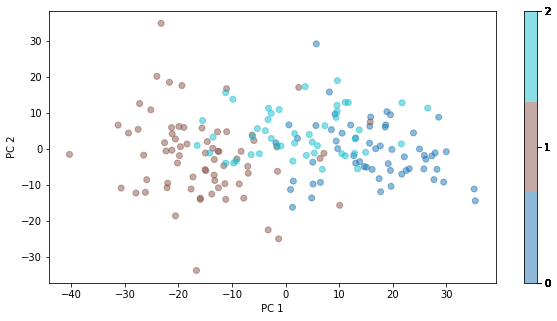

In [14]:
fig = plt.figure(figsize=(10,5))

# Create a scatter plot of the projection
scat = plt.scatter(Z_vast[:,0], Z_vast[:,1], c=wine_target, cmap=plt.get_cmap('tab10',3),alpha=0.5)
plt.colorbar(scat, ticks=wine_target)
plt.xlabel(' PC 1 ')
plt.ylabel(' PC 2 ')
plt.show()

## Compare the eigenvectors

Now, we are going to visualize the eigenvectors resulting from no scaling, standard (auto) scaling and VAST scaling.

We are going to use the `pyplot`'s `bar` function which helps us generate bar plots. You can use this template to plot the eigenvectors:

```
plt.bar(x_ticks, height, width=bar_width, color='k', label='Scaling')
```

Where `x_ticks` specifies the locations on the x-axis where the bars will be plotted, and `height` specifies the height for each bar.

Also plot the legend that explains which eigenvector result from which data scaling option.

In [15]:
# The x_ticks parameter will help you label the x-axis:
x_ticks = np.array([i for i in range(0,n_features)])

# The bar_width parameter controls the width of each bar on the bar plot:
bar_width = 0.2

# Since we are going to compute three bar plots on one plot, we will offset the bar plots so that they are easier to visualize:
offset = 0.2

 - To do:
     - Plot the comparison of the **first** eigenvector from the three data scaling options:

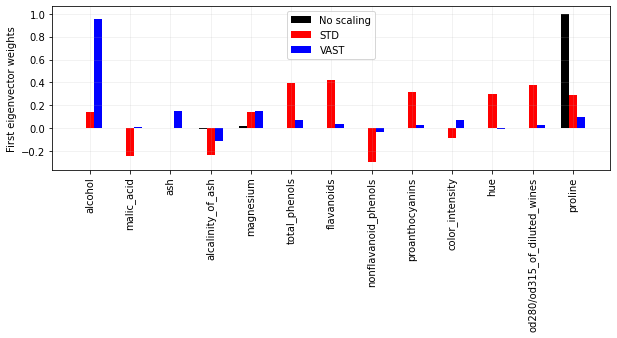

In [16]:
iq = 0;

fig = plt.figure(figsize=(10,3))

plt.bar(x_ticks - offset, A0[:,iq]    , width=bar_width, color='k', label='No scaling')
plt.bar(x_ticks         , A_std[:,iq] , width=bar_width, color='r', label='STD')
plt.bar(x_ticks + offset, A_vast[:,iq], width=bar_width, color='b', label='VAST')

plt.xticks(x_ticks, feature_names, rotation=90)
plt.ylabel('First eigenvector weights')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

Plot the comparison of the **second** eigenvector from the three data scaling options:

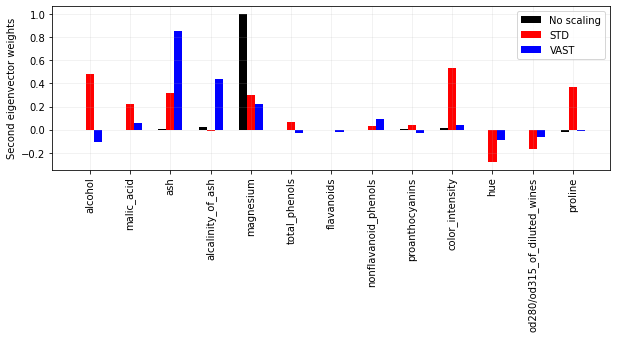

In [17]:
iq = 1;

fig = plt.figure(figsize=(10,3))

plt.bar(x_ticks - offset, A0[:,iq]    , width=bar_width, color='k', label='No scaling')
plt.bar(x_ticks         , A_std[:,iq] , width=bar_width, color='r', label='STD')
plt.bar(x_ticks + offset, A_vast[:,iq], width=bar_width, color='b', label='VAST')

plt.xticks(x_ticks, feature_names, rotation=90)
plt.ylabel('Second eigenvector weights')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

## Compare the eigenvalues

Finally, we are going to visualize the scree plot of eigenvalues resulting from no scaling, standard (auto) scaling and VAST scaling.

Remember to also plot the legend that explains which eigenvalues result from which data scaling option.

What differences do you observe?

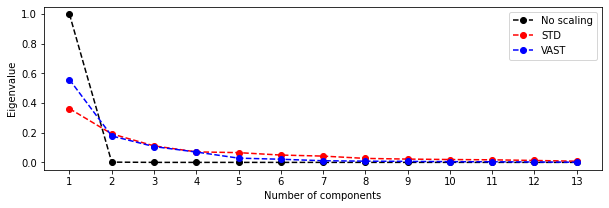

In [18]:
fig = plt.figure(figsize=(10,3))

plt.plot(x_ticks+1, L0    , 'ko--', label='No scaling') 
plt.plot(x_ticks+1, L_std , 'ro--', label='STD') 
plt.plot(x_ticks+1, L_vast, 'bo--', label='VAST') 

plt.xticks(x_ticks+1)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()

Final tip: if you'd like to save the plots that you produced, you can add the following command after plotting:

```
plt.savefig('figure.png', dpi=200, bbox_inches='tight')
```

You can also control the file extension, e.g. you can save the plot to `.pdf` format instead of `.png`:

```
plt.savefig('figure.pdf', dpi=200, bbox_inches='tight')
```

***